In [1]:
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv("dataset_olympics.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [5]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [6]:
df.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

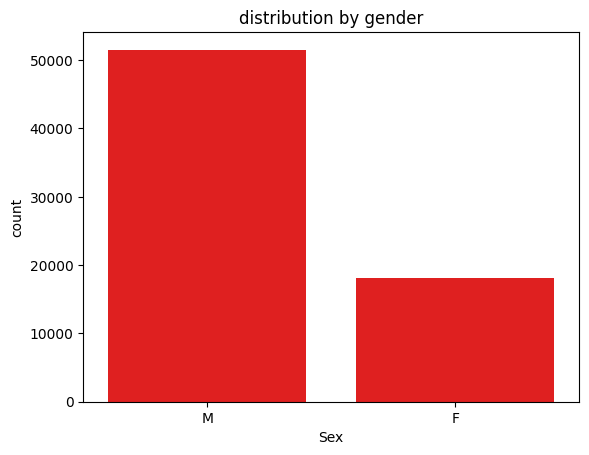

In [14]:
sb.countplot(data=df,x="Sex",color="red")
plt.title("distribution by gender")
plt.show()

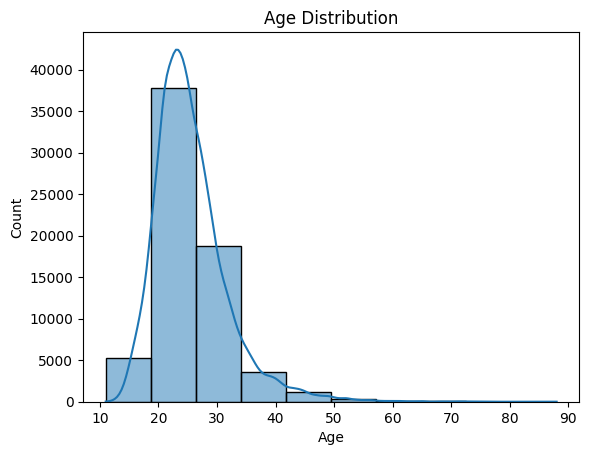

In [20]:
sb.histplot(data=df,x="Age",bins=10,kde=True)
plt.title("Age Distribution")
plt.show()

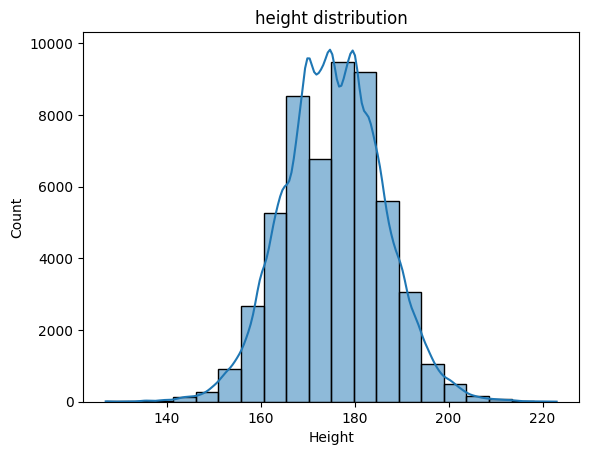

In [23]:
sb.histplot(data=df,x="Height",bins=20,kde=True)
plt.title("height distribution")
plt.show()

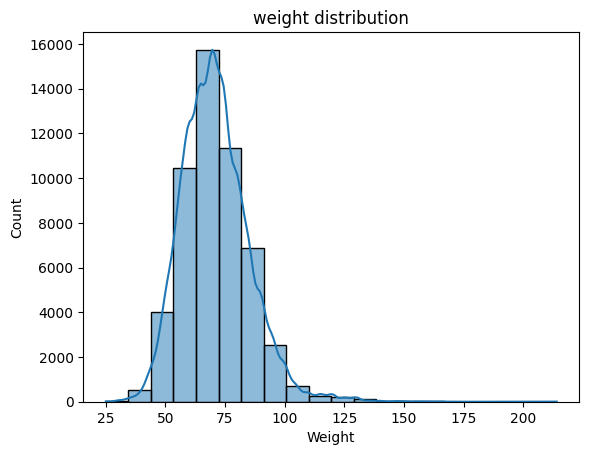

In [26]:
sb.histplot(data=df,x="Weight",bins=20,kde=True)
plt.title("weight distribution")
plt.show()

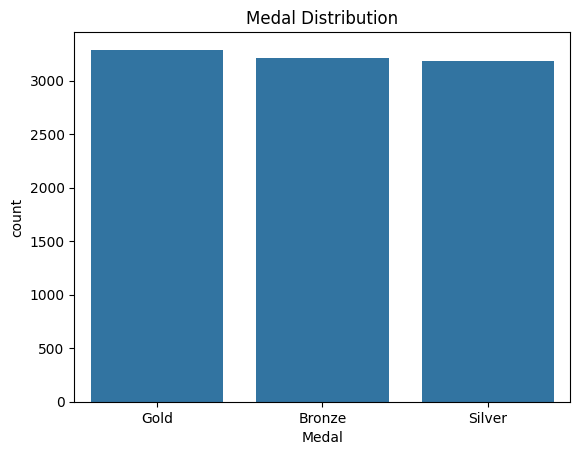

In [27]:
sb.countplot(data=df,x="Medal")
plt.title("Medal Distribution")
plt.show()

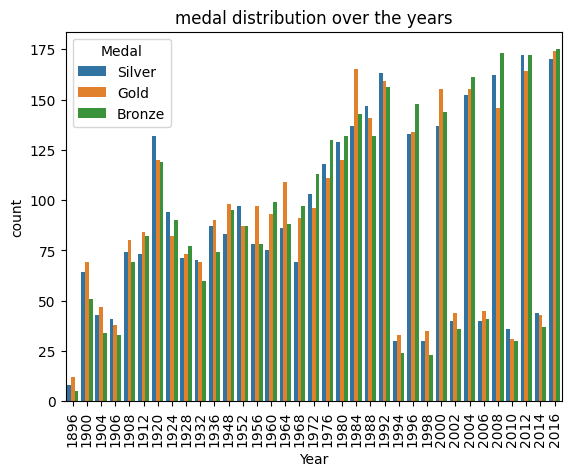

In [35]:
sb.countplot(data=df,x="Year",hue="Medal") #countplot is used for categorical data
plt.title("medal distribution over the years")
plt.xticks(rotation=90) #used to rotate the attribute angle
plt.show()

In [39]:
year_average_age=df.groupby("Year")["Age"].mean()
year_average_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

In [45]:
sport_median_height=df.groupby("Sport")["Height"].median()
sport_median_height.max()

190.0

In [46]:
sport_median_height[sport_median_height==190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [50]:
country_gender_count=df.groupby(["NOC","Sex"])["ID"].count()
country_gender_count.reset_index()

,NOC,Sex,ID
0,AFG,M,38
1,AHO,F,6
2,AHO,M,27
3,ALB,F,4
4,ALB,M,7
...,...,...,...
427,YUG,M,455
428,ZAM,F,3
429,ZAM,M,40
430,ZIM,F,41


In [61]:
country_gold_medals=df[df["Medal"]=="Gold"].groupby("NOC")["Medal"].count()
country_gold_medals.max()


747

In [63]:
country_gold_medals[country_gold_medals==747].reset_index()

,NOC,Medal
0,USA,747


In [74]:
sport_gender_average_weight=df.groupby(["Sport","Sex"])["Weight"].mean()
sport_gender_average_weight["Wrestling"]["F"]

58.16901408450704

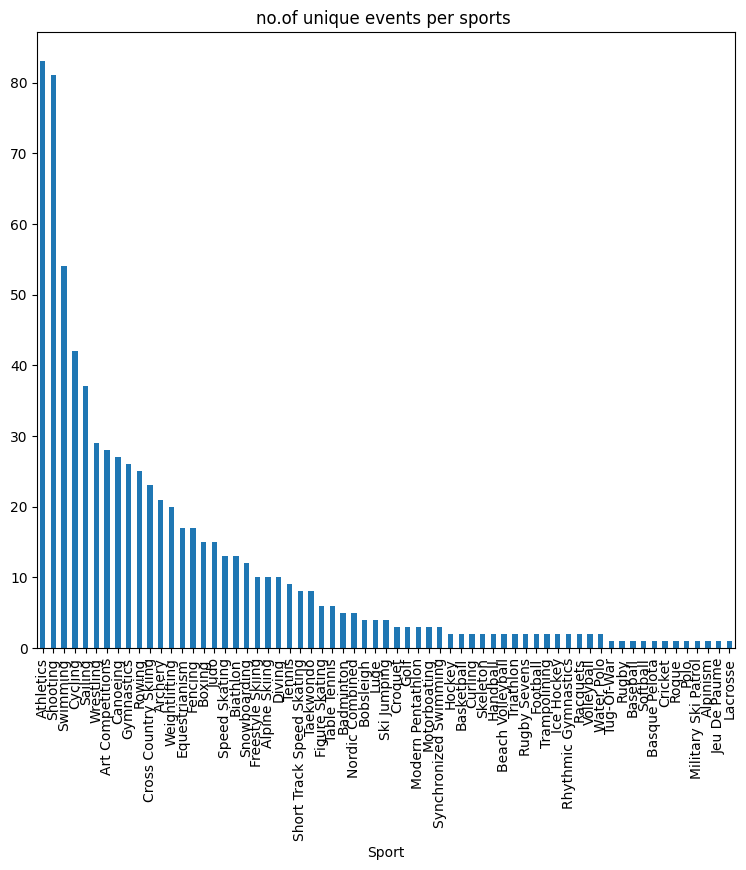

In [ ]:
sport_event_count=df.groupby("Sport")["Event"].nunique().sort_values(ascending=False)
plt.figure(figsize=(9,8))

sport_event_count.plot(kind="bar")
plt.title("no.of unique events per sports ")
plt.show()

In [90]:
year_participants_count=df.groupby("Year")["ID"].nunique()
year_participants_count.max()

3003

In [92]:
year_participants_count[year_participants_count==3003].reset_index()

,Year,ID
0,2016,3003


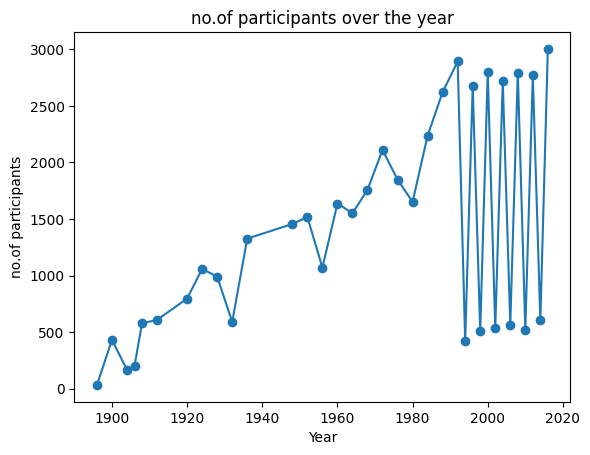

In [96]:
year_participants_count.plot(kind="line",marker="o")
plt.title("no.of participants over the year")
plt.ylabel("no.of participants")
plt.show()

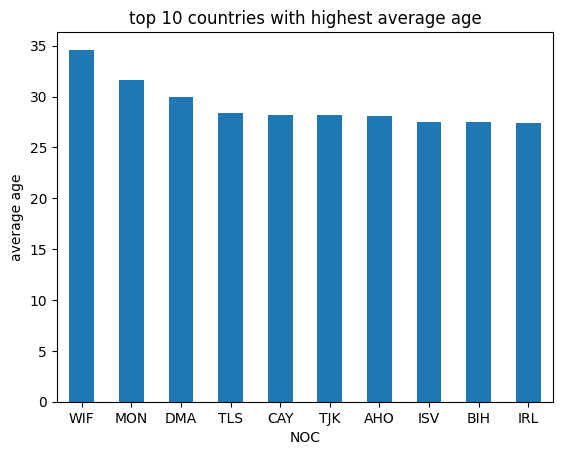

In [108]:
country_avg_age=df.groupby("NOC")["Age"].mean().sort_values(ascending=False)
country_avg_age.head(10).plot(kind="bar")
plt.title("top 10 countries with highest average age")
plt.ylabel("average age")
plt.xticks(rotation=0)
plt.show()

In [109]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

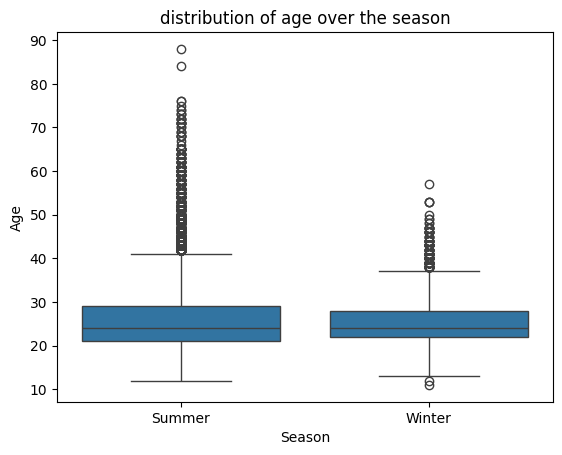

In [113]:
sb.boxplot(data=df,x="Season",y="Age")
plt.title("distribution of age over the season")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21348\3370540244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df,x="Medal",y="Height",palette="Set1") #palette is used to represent categories with different colors


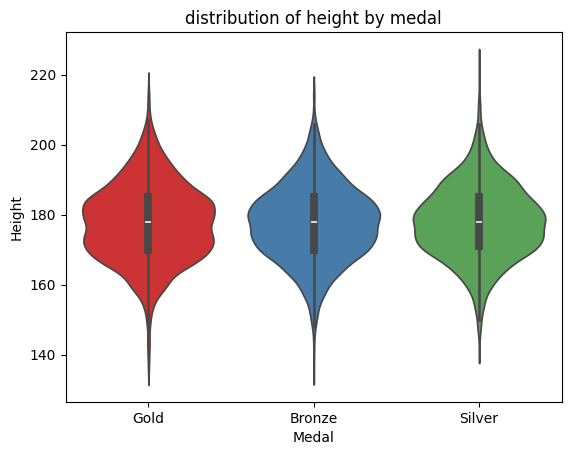

In [128]:
sb.violinplot(data=df,x="Medal",y="Height",palette="Set1") #palette is used to represent categories with different colors
plt.title("distribution of height by medal")
plt.show()

In [131]:
most_medals_country=df["NOC"].value_counts().idxmax()
most_medals_country

'USA'

In [138]:
tallest_athlete=df[df["Height"]==df["Height"].max()]
tallest_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver


In [142]:
heaviest_athlete=df[df["Weight"]==df["Weight"].min()]
heaviest_athlete[["ID","Name","NOC"]]

,ID,Name,NOC
40849,21049,Choi Myong-Hui,PRK
40850,21049,Choi Myong-Hui,PRK
40851,21049,Choi Myong-Hui,PRK
40852,21049,Choi Myong-Hui,PRK
40853,21049,Choi Myong-Hui,PRK
40854,21049,Choi Myong-Hui,PRK


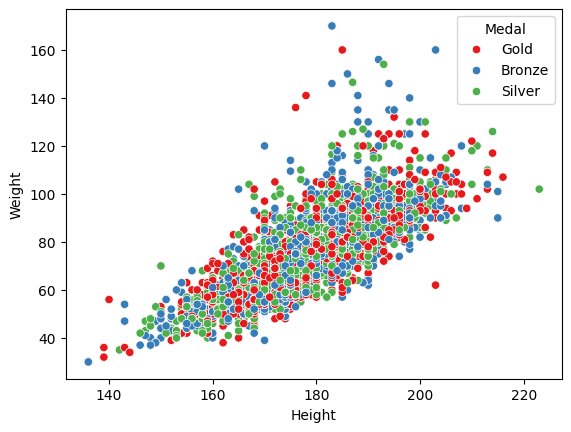

In [148]:
sb.scatterplot(data=df,x="Height",y="Weight",hue="Medal",palette="Set1")
plt.show()

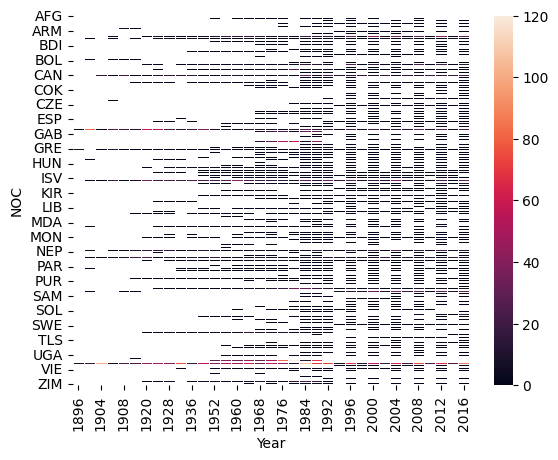

In [159]:
medals_by_country_year=df.pivot_table(index="NOC",columns="Year",values="Medal",aggfunc="count")
sb.heatmap(medals_by_country_year,linewidths=0.5)
plt.show()